In [2]:
import torch

In [1]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device


device = get_device(force_cpu=False)
train_loader, test_loader = get_data(device,batch_size=64,data = 'cifar10')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
##################### MODEL


from model2 import ResNet18
from torchsummary import summary
model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [6]:
##################### RUN MODEL

from run import run_model

epochs = 20
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, **regularization)


Epoch 1:
(TRAIN) batch_number:  100 Loss : 1.564 Acc : 0.29016
(TRAIN) batch_number:  200 Loss : 1.537 Acc : 0.35922
(TRAIN) batch_number:  300 Loss : 1.208 Acc : 0.40349
(TRAIN) batch_number:  400 Loss : 1.343 Acc : 0.43906
(TRAIN) batch_number:  500 Loss : 0.9602 Acc : 0.46937
(TRAIN) batch_number:  600 Loss : 1.092 Acc : 0.49438
(TRAIN) batch_number:  700 Loss : 1.232 Acc : 0.51692
(TEST) Correct_classified :  6429  of 10000
(TEST) Loss : 1.022 Acc : 0.6429

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 0.7389 Acc : 0.69937
(TRAIN) batch_number:  200 Loss : 0.6003 Acc : 0.705
(TRAIN) batch_number:  300 Loss : 0.7078 Acc : 0.71031
(TRAIN) batch_number:  400 Loss : 0.8381 Acc : 0.71762
(TRAIN) batch_number:  500 Loss : 0.6848 Acc : 0.72194
(TRAIN) batch_number:  600 Loss : 0.7079 Acc : 0.72602
(TRAIN) batch_number:  700 Loss : 0.695 Acc : 0.72971
(TEST) Correct_classified :  7428  of 10000
(TEST) Loss : 0.7407 Acc : 0.7428

(TRAIN) batch_number:  200 Loss : 0.006331 Acc : 0.99977
(TRAIN) batch_number:  300 Loss : 0.004895 Acc : 0.99964
(TRAIN) batch_number:  400 Loss : 0.006078 Acc : 0.99969
(TRAIN) batch_number:  500 Loss : 0.002661 Acc : 0.99972
(TRAIN) batch_number:  600 Loss : 0.006224 Acc : 0.99977
(TRAIN) batch_number:  700 Loss : 0.003225 Acc : 0.99975
(TEST) Correct_classified :  8507  of 10000
(TEST) Loss : 0.5505 Acc : 0.8507

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.01014 Acc : 0.99984
(TRAIN) batch_number:  200 Loss : 0.009406 Acc : 0.99977
(TRAIN) batch_number:  300 Loss : 0.008489 Acc : 0.99979
(TRAIN) batch_number:  400 Loss : 0.008324 Acc : 0.9998
(TRAIN) batch_number:  500 Loss : 0.004515 Acc : 0.99984
(TRAIN) batch_number:  600 Loss : 0.02813 Acc : 0.99979
(TRAIN) batch_number:  700 Loss : 0.004464 Acc : 0.9998
(TEST) Correct_classified :  8512  of 10000
(TEST) Loss : 0.5607 Acc : 0.8512

 *****************************

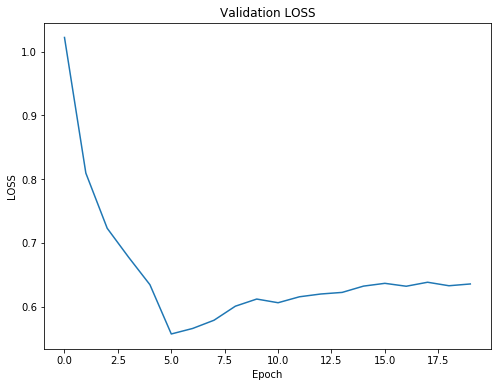

In [7]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(test_trackers['test_losses'])


# Set plot title
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'
